# Program your first neural network with TensorFlow and PyTorch

### 0. Import required libraries


In [ ]:
# https://github.com/pytorch/vision/issues/1938#issuecomment-789986996
from six.moves import urllib
opener = urllib.request.build_opener()
opener.addheaders = [('User-agent', 'Mozilla/5.0')]
urllib.request.install_opener(opener)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

epochs = 10
batch_size=64

TensorFlow:

In [ ]:
import tensorflow as tf

PyTorch:

In [ ]:
import torch
import torchvision


## 1. Load and Preprocessing Data

TensorFlow:

In [ ]:
(x_trainTF_, y_trainTF_), _ = tf.keras.datasets.mnist.load_data()

x_trainTF = x_trainTF_.reshape(60000, 784).astype('float32')/255
y_trainTF = tf.keras.utils.to_categorical(y_trainTF_, num_classes=10)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


PyTorch:

In [ ]:
xy_trainPT = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=torchvision.transforms.Compose([torchvision.transforms.ToTensor()]))

xy_trainPT_loader = torch.utils.data.DataLoader(xy_trainPT, batch_size=batch_size)


Checking the data:

TensorFlow:


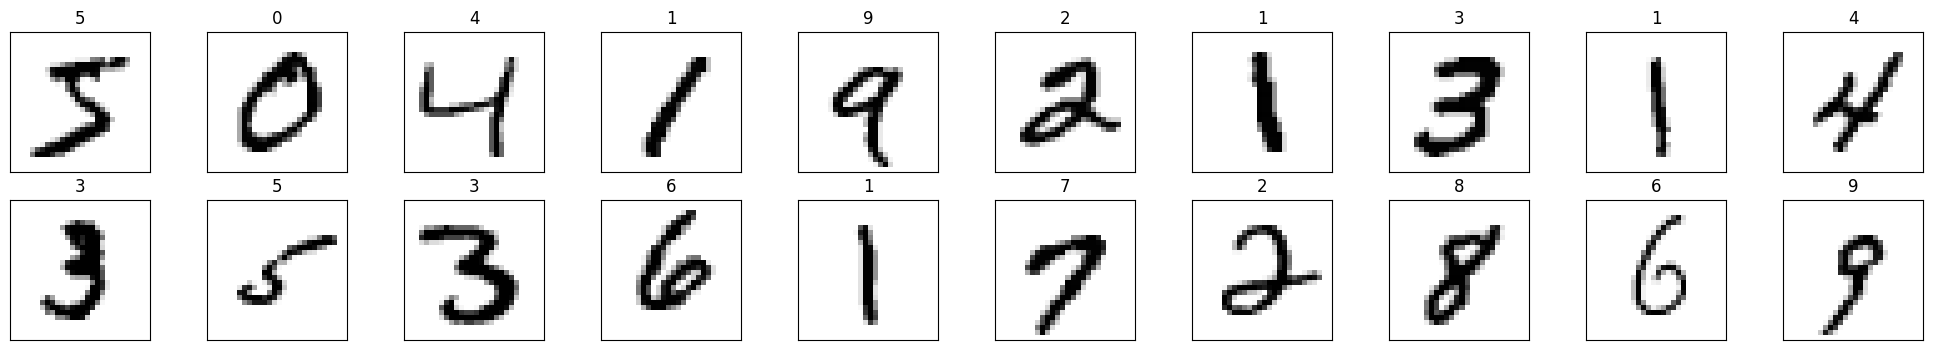

In [ ]:
print("TensorFlow:")
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
    ax.imshow(x_trainTF_[idx], cmap=plt.cm.binary)
    ax.set_title(str(y_trainTF_[idx]))

Pytorch:


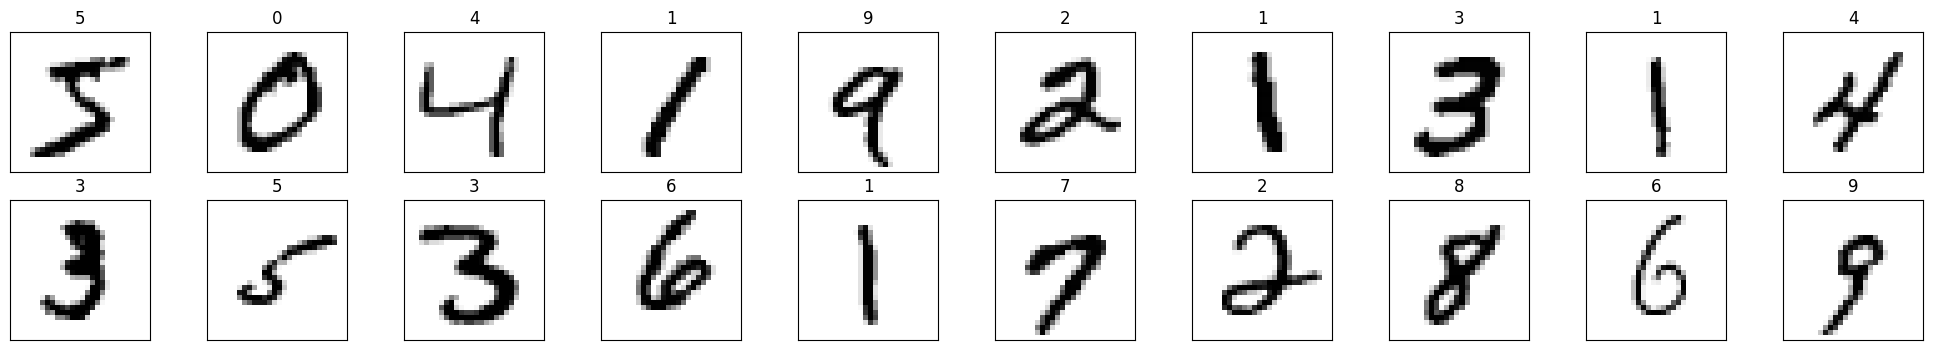

In [ ]:
print("Pytorch:")
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
    image, label = xy_trainPT [idx]
    ax.imshow(torch.squeeze(image, dim = 0).numpy(), cmap=plt.cm.binary)
    ax.set_title(str(label))

## 2 - Define Model
TensorFlow:

In [ ]:
modelTF = tf.keras.Sequential([
                             tf.keras.layers.Dense(10,activation='sigmoid',input_shape=(784,)),
                             tf.keras.layers.Dense(10,activation='softmax')
            ])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


PyTorch:

In [ ]:
modelPT=torch.nn.Sequential(torch.nn.Linear(784,10),
                          torch.nn.Sigmoid(),
                          torch.nn.Linear(10,10),
                          torch.nn.LogSoftmax(dim=1)
                         )

##3. Define the Optimizer and the Loss function

TensorFlow:

In [ ]:
modelTF.compile(
               loss="categorical_crossentropy",
               optimizer=tf.optimizers.SGD(learning_rate=0.01),
               metrics = ['accuracy']
               )


PyTorch:

In [ ]:
criterion = torch.nn.NLLLoss()
optimizer = torch.optim.SGD(modelPT.parameters(), lr=0.01)


##4. Train the model

TensorFlow:

In [ ]:
_ = modelTF.fit(x_trainTF, y_trainTF, epochs=epochs, batch_size=batch_size, verbose = 0)


PyTorch:

In [ ]:
for e in range(epochs):
    for images, labels in xy_trainPT_loader:
        images = images.view(images.shape[0], -1)
        loss = criterion(modelPT(images), labels)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

## Evaluate the Model
TensorFlow:

In [ ]:
_, (x_testTF, y_testTF)= tf.keras.datasets.mnist.load_data()
x_testTF = x_testTF.reshape(10000, 784).astype('float32')/255
y_testTF = tf.keras.utils.to_categorical(y_testTF, num_classes=10)

_ , test_accTF = modelTF.evaluate(x_testTF, y_testTF, verbose=0)
print('\nTensorFlow model Accuracy =', test_accTF)


TensorFlow model Accuracy = 0.8575999736785889


PyTorch:

In [ ]:
xy_testPT = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=torchvision.transforms.Compose([torchvision.transforms.ToTensor()]))
xy_test_loaderPT  = torch.utils.data.DataLoader(xy_testPT)

correct_count, all_count = 0, 0
for images,labels in xy_test_loaderPT:
  for i in range(len(labels)):
    img = images[i].view(1, 784)

    logps = modelPT(img)
    ps = torch.exp(logps)
    probab = list(ps.detach().numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("\nPyTorch model Accuracy  =", (correct_count/all_count))


PyTorch model Accuracy  = 0.8464
